# CSE 482 Final Project

## 1. Team member names and roles:

- **Wenting Liu**: User-based recommendation, Item-based recommendation, KNN ML model recommendation, Organizing and reporting.


- **Yuhan Zhu**: Collect the data, Machine learning model exploration.


- **Tiancheng Liu**: Data processing, Machine learning model exploration.


## 2. Problem introduction:

### 2.1 Topic: Recommender System of Movie Ratings [MovieLens](https://grouplens.org/datasets/movielens/)

1. Apply user-based and item-based recommendation algorithm as follows.
    
    • For each user, calculate its top-k nearest neighbors (i.e., other users who share the most similar item preferences). Use the weighted average ratings of the neighbors to estimate whether the user likes an item he/she has not rated.

    • For each item, calculate its top-k nearest neighbors (i.e., other items whose ratings are most correlated to it). Use the weighted average ratings of the user on the most similar items to estimate whether the user likes an item he/she has not rated.


2. Create training and test sets from the data. Compare the performance of the two approaches described above in terms of their accuracy on the test set. You are free to consider other approaches as well (e.g., Mahout’s recommender system).

### 2.2 Background introduction:

- [ml-latest-small](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html)
    
- It contains **100836 ratings** and 3683 tag applications across **9742 movies**. These data were created by **610 users** between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018


## 3. Solution and Result: 

### 3.1 Data Pre-processing:

In [108]:
# Load data:
import pandas as pd

links = pd.read_csv("links.csv",encoding="Latin1")
tags = pd.read_csv("tags.csv",encoding="Latin1")
movies = pd.read_csv("movies.csv",encoding="Latin1")
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [109]:
# Calculate each movie's rating mean of each user:
mean = ratings.groupby(by="userId", as_index=False)['rating'].mean()
mean.head()

,userId,rating
0,1,4.366379
1,2,3.948276
2,3,2.435897
3,4,3.555556
4,5,3.636364


In [110]:
# Data normalization:
rating_avg = pd.merge(ratings, mean, on='userId')
rating_avg['adg_rating']=rating_avg['rating_x']-rating_avg['rating_y']
rating_avg.head()

,userId,movieId,rating_x,timestamp,rating_y,adg_rating
0,1,1,4.0,964982703,4.366379,-0.366379
1,1,3,4.0,964981247,4.366379,-0.366379
2,1,6,4.0,964982224,4.366379,-0.366379
3,1,47,5.0,964983815,4.366379,0.633621
4,1,50,5.0,964982931,4.366379,0.633621


In [111]:
# Got pivot table:
final=pd.pivot_table(rating_avg, values='adg_rating', index='userId', columns='movieId')
final.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.366379,NaN,-0.366379,NaN,NaN,-0.366379,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.363636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# Replacing NaN by Movie Average
final_movie = final.fillna(final.mean(axis=0))
final_movie.head()

# final_movie.to_csv('final_movie.csv')

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.366379,-0.053158,-0.366379,-1.096045,-0.522626,-0.366379,-0.400728,-0.625024,-0.455446,-0.056326,...,-0.205224,-0.705224,0.294776,0.294776,-0.205224,0.294776,-0.205224,-0.205224,-0.205224,0.372024
2,0.312167,-0.053158,-0.234798,-1.096045,-0.522626,0.378461,-0.400728,-0.625024,-0.455446,-0.056326,...,-0.205224,-0.705224,0.294776,0.294776,-0.205224,0.294776,-0.205224,-0.205224,-0.205224,0.372024
3,0.312167,-0.053158,-0.234798,-1.096045,-0.522626,0.378461,-0.400728,-0.625024,-0.455446,-0.056326,...,-0.205224,-0.705224,0.294776,0.294776,-0.205224,0.294776,-0.205224,-0.205224,-0.205224,0.372024
4,0.312167,-0.053158,-0.234798,-1.096045,-0.522626,0.378461,-0.400728,-0.625024,-0.455446,-0.056326,...,-0.205224,-0.705224,0.294776,0.294776,-0.205224,0.294776,-0.205224,-0.205224,-0.205224,0.372024
5,0.363636,-0.053158,-0.234798,-1.096045,-0.522626,0.378461,-0.400728,-0.625024,-0.455446,-0.056326,...,-0.205224,-0.705224,0.294776,0.294776,-0.205224,0.294776,-0.205224,-0.205224,-0.205224,0.372024


### 3.2 User-based Recommendation:

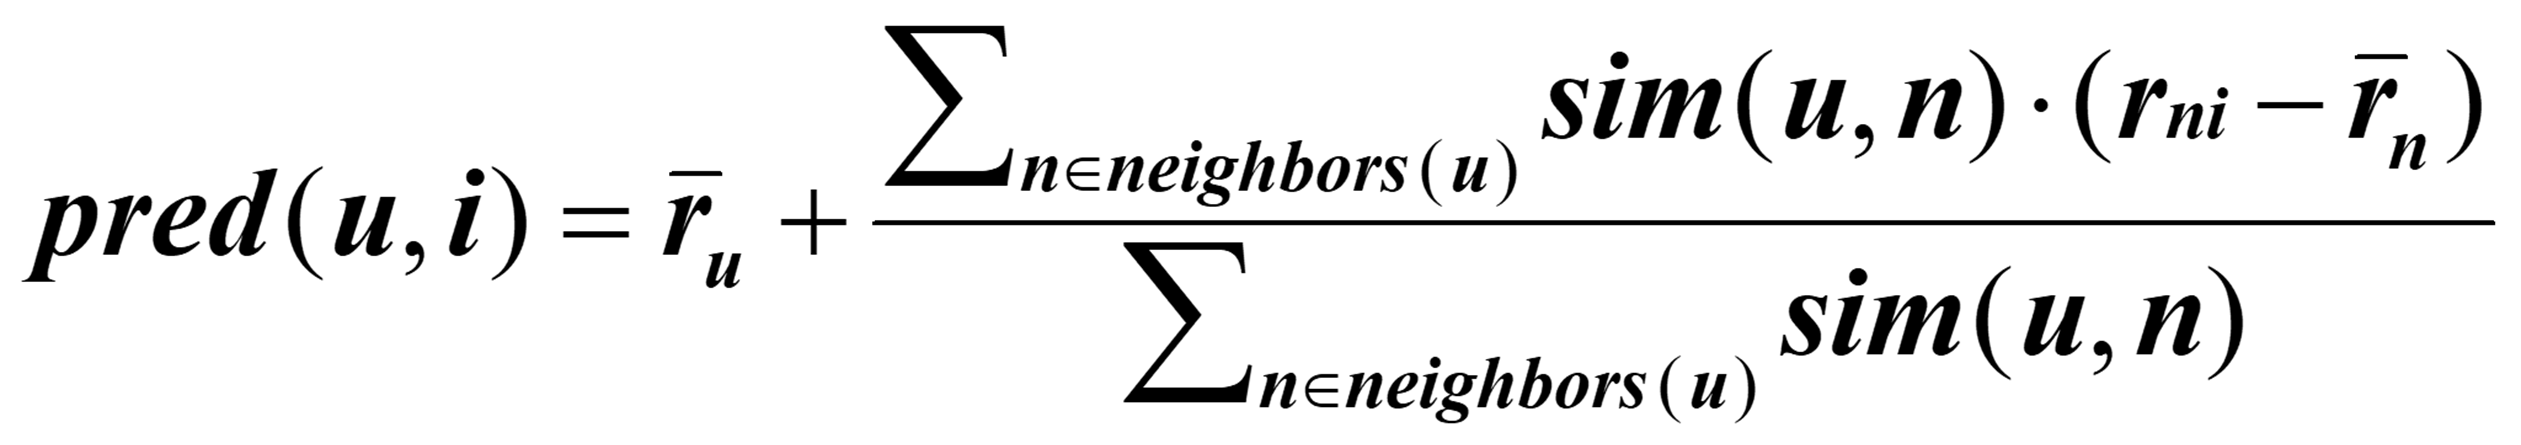

In [113]:
# Calculate the similarity between the users
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

cosine = cosine_similarity(final_movie)
np.fill_diagonal(cosine, 0 )

user_baesd_similarity =pd.DataFrame(cosine)
user_baesd_similarity.shape

(610, 610)

In [114]:
# Top 10 neighbours for each user

def find_n_neighbours(df, n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

sim_user_10_m = find_n_neighbours(user_baesd_similarity, 10)
sim_user_10_m.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
0,48,53,71,52,514,549,188,132,25,512
1,48,188,514,52,24,144,53,25,86,193
2,514,48,24,52,495,53,441,71,25,86
3,580,53,188,48,24,514,299,52,471,250
4,144,48,514,52,608,25,188,549,34,86


In [123]:
# Generating the user_based predicting score:

def User_based_score(user, item):
    a = sim_user_10_m[sim_user_10_m.index==user].values
    b = a.squeeze().tolist()
    c = final_movie.loc[:,item]
    d = c[c.index.isin(b)]
    f = d[d.notnull()]
    index = f.index.values.squeeze().tolist()
    corr = user_baesd_similarity.loc[user, index]
    avg_user = mean.loc[mean['userId'] == user,'rating'].values[0]
    fin = pd.concat([f, corr], axis=1)
    fin.columns = ['adg_score','correlation']
    fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
    nume = fin['score'].sum()
    deno = fin['correlation'].sum()
    final_score = avg_user + (nume/deno)
    return final_score

score = User_based_score(206, 2915)
print(score)

4.086058767871002


In [116]:
# User-based Recommendation Systems:

a = sim_user_10_m[sim_user_10_m.index==206].values
b = a.squeeze().tolist()
c = final_movie.loc[:,2915]
d = c[c.index.isin(b)]
f = d[d.notnull()]
index_user_based = f.index.values.squeeze().tolist()
index_user_based

[24, 25, 48, 52, 53, 86, 188, 193, 514, 549]

### 3.3 Item-based Recommendation:

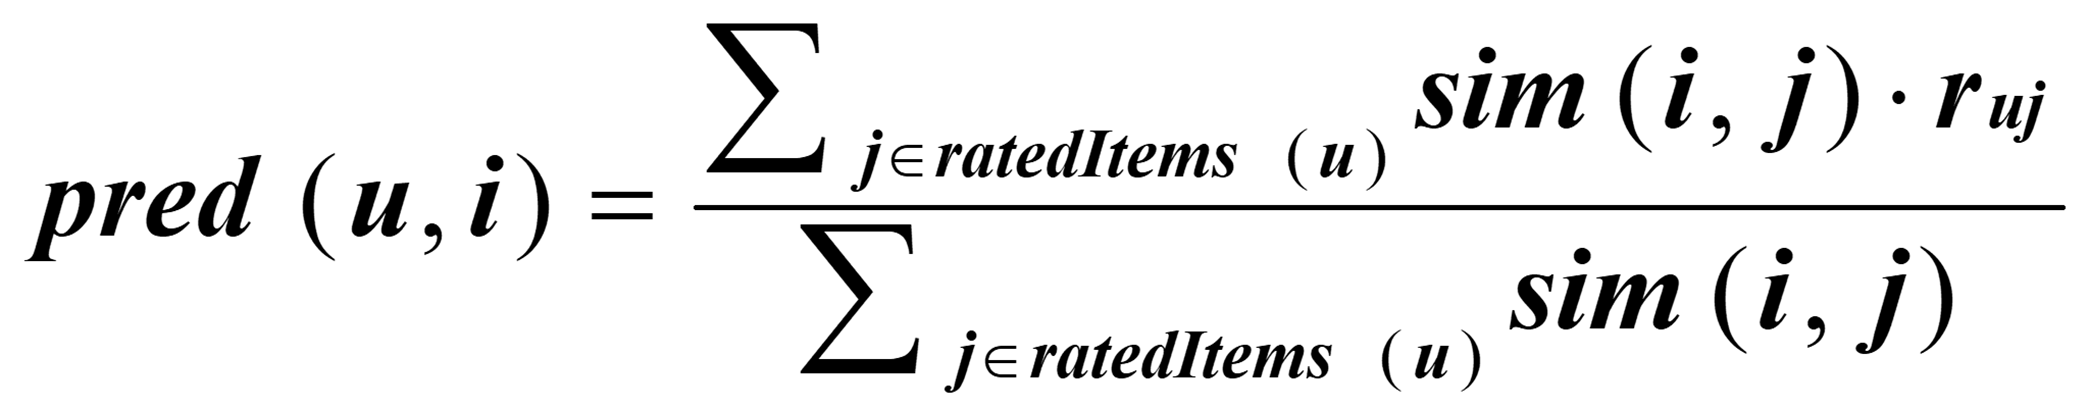

In [117]:
# Calculate the similarity between the items
from sklearn.metrics.pairwise import cosine_similarity

cosine = cosine_similarity(final_movie.T)
np.fill_diagonal(cosine, 0)

item_based_similarity =pd.DataFrame(cosine)
item_based_similarity.shape

(9724, 9724)

In [118]:
# Top 10 neighbours for each item

def find_n_neighbours(df, n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

sim_item_10_m = find_n_neighbours(item_based_similarity, 10)
sim_item_10_m.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
0,867,7338,2353,3431,8681,2051,7757,2508,4601,3808
1,325,1730,436,276,84,8767,6851,7134,7407,131
2,1817,363,774,230,178,1599,1120,2985,497,376
3,241,310,5781,1676,3110,3638,7560,9540,9326,5107
4,178,49,119,4182,4443,4543,34,494,106,3447


In [124]:
# Generating the item_based predicting score:

def Item_based_score(user, item):
    a = sim_item_10_m[sim_item_10_m.index==item].values
    b = a.squeeze().tolist()
    c = final_movie.loc[user, :]
    d = c[c.index.isin(b)]
    f = d[d.notnull()]
    index = f.index.values.squeeze().tolist()
    corr = item_based_similarity.loc[index, item]
    user_item = []
    for i in index: user_item.append(rating_avg.loc[rating_avg['movieId'] == i, 'rating_x'].mean())
    user_item_new = pd.Series(user_item, index = index)
    fin = pd.concat([f, corr, user_item_new], axis=1)
    fin.columns = ['adg_score','correlation', 'uj']
    fin['score']=fin.apply(lambda x:x['correlation'] * x['uj'], axis=1)
    nume = fin['score'].sum()
    deno = fin['correlation'].sum()
    final_score = nume/deno
    return final_score

score = Item_based_score(206, 2915)
print(score)

2.7647953463643513


In [125]:
# Item-based Recommendation Systems:

a = sim_item_10_m[sim_item_10_m.index==2915].values
b = a.squeeze().tolist()
c = final_movie.loc[206, :]
d = c[c.index.isin(b)]
f = d[d.notnull()]
index_item_based = f.index.values.squeeze().tolist()
index_item_based

[2018, 2114, 3389, 3432, 3584, 3920]

[Reference](https://medium.com/sfu-cspmp/recommendation-systems-user-based-collaborative-filtering-using-n-nearest-neighbors-bf7361dc24e0)

### 3.4 KNN Reconmmendation System:

In [126]:
# KNN User-based Recommendation Systems:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Convert dataframe of movie features to scipy sparse matrix
mat_movie_features = csr_matrix(final_movie.values)

# KNN model:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)
model_knn.fit(mat_movie_features)

# Recommendation Systems:
np.random.seed(5)
query_index = np.random.choice(final_movie.shape[0])
print("recomendation for user id based on user id:",query_index)

distances1, indices1 = model_knn.kneighbors(final_movie.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 10)
print("indices_user_based",indices1)

recomendation for user id based on user id: 206
indices_user_based [[206  52  53  48 514  24  25  86 193 549]]


In [127]:
# KNN Item-based Recommendation Systems:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Convert dataframe of movie features to scipy sparse matrix
mat_movie_features2 = csr_matrix(final_movie.T.values)

# KNN model:
model_knn2 = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)
model_knn2.fit(mat_movie_features2)

# Recommendation Systems:
np.random.seed(5)
query_index = np.random.choice(final_movie.shape[1])
print("recomendation for movie id based on movie id:", query_index)

distances2, indices2 = model_knn2.kneighbors(final_movie.iloc[:, query_index].values.reshape(1, -1), n_neighbors = 10)
print("indices_item_based",indices2)

recomendation for movie id based on movie id: 2915
indices_item_based [[2915 3920 9601 3389 5911 8787 2018 6900 2114 3584]]


[Reference](https://www.kaggle.com/code/selcukcan/ml-6-4-knn-movie-recommendation-system)

## 4. Conclusion and discussion:

### 4.1 Conclusion

- In this project, we built movie recommendation systems by using **user based** filtering method, **item based** filtering method and **KNN machine learning model**.

- We imputed all the missing values with the mean of each movie's rating. 

- For both user-based and item-based methods, we used Cosine Similarity.

- For KNN machine learning model, we treated the whole dataset as training dataset to build the recommendation system, and we devided the system into two parts, user-based KNN, and item_based KNN, in order to compare with the two methods above.

- From the results below we can see that, for same user id (206) and same movie id (2915):

    - User based vs KNN:
    
        - The user based method recommended 10 similar users (not include 206), and KNN method recommended 10 similar users (include 206).
        
        - **There are 9 same users**.

    - Item based vs KNN:
    
        - The item based method recommended 6 similar users (not include 2915), and KNN method recommended 10 similar users (include 2915).
        
        - **There are 5 same items**.

In [149]:
# The recommendation users comparison for User based method and KNN (user id (206)):

## User based:
print("User based: ", sorted([index_user_based]))

## KNN:
indices1 = indices1.tolist()
print("KNN:        ", sorted(indices1))

User based:  [[24, 25, 48, 52, 53, 86, 188, 193, 514, 549]]
KNN:         [[24, 25, 48, 52, 53, 86, 193, 206, 514, 549]]


In [148]:
# The recommendation items comparison for Item based method and KNN (movie id (2915)):

## User based:
print("Item based: ", sorted([index_item_based]))

## KNN:
indices2 = indices2.tolist()
print("KNN:        ", sorted(indices2))

Item based:  [[2018, 2114, 3389, 3432, 3584, 3920]]
KNN:         [[2915, 3920, 9601, 3389, 5911, 8787, 2018, 6900, 2114, 3584]]


### 4.2 Discussion

- All three recommendation systems need to be more applicable, since we only got the recommendation of movie id instead of movie name.

- For ML model part, we could expand the training dataset as the [full dataset](https://files.grouplens.org/datasets/movielens/ml-latest-README.html), which contains *27753444 ratings* and 1108997 tag applications across *58098 movies*. These data were created by *283228 users* between January 09, 1995 and September 26, 2018. This dataset was generated on September 26, 2018.

- We could also explore some other ML models, like Mahout’s recommender system, etc.